In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from wordEmbedders import Word2Vec, WESCScore, WESClassifier
from tqdm.notebook import tqdm
from prettytable import PrettyTable
tqdm.pandas()

In [2]:
wordEmbedders = [Word2Vec]

In [3]:
positiveWords = ["good", "nice", "cool", "lovely", "wonderful", "great", "awesome", "fantastic", "amazing", "fun", "excellent"]
negativeWords = ["bad", "horrible", "terrible", "awful", "worst", "shitty", "crappy", "sucks", "hate"]

In [4]:
dataset = 'AirlineTweets'


dataFile = f'./data/{dataset}/Data-Cleaned.csv'
outputFile = f'./data/{dataset}/Data-Predicted.csv'
if not os.path.exists(dataFile):
    raise ValueError(f'Dataset {dataset} has not been cleaned')

df = pd.read_csv(dataFile)
embedder = Word2Vec

modelFile = f'./models/{dataset}/{embedder.name}.model'
model = embedder.load(modelFile)
classifier = WESClassifier(model, positiveWords, negativeWords)

In [5]:
result = classifier.predict(df)

  0%|          | 0/11541 [00:00<?, ?it/s]

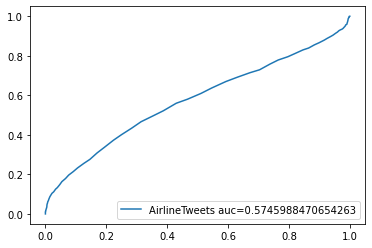

In [6]:
result.roc_auc_curve(label='AirlineTweets')

In [56]:
table = PrettyTable(['Dataset', 'Balanced Accuracy', 'F1 Score', 'Confusion Matrix'])

In [57]:
table.add_row(['AirlineTweets', result.balancedAccuracy, result.f1Score, result.confusionMatrix])

In [58]:
print(table)

+---------------+--------------------+---------------------+------------------+
|    Dataset    | Balanced Accuracy  |       F1 Score      | Confusion Matrix |
+---------------+--------------------+---------------------+------------------+
| AirlineTweets | 0.5384148067187106 | 0.16235893702220605 |    223 | 161     |
|               |                    |                     |   -----+-----    |
|               |                    |                     |   2140 | 9017    |
+---------------+--------------------+---------------------+------------------+
